In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np

In [43]:
data = pd.read_csv("D:\\DSMethodolgy_assignments\\final__project\\customer_transactions_.csv")
# Convert the loaded data into a DataFrame for easier manipulation
df = pd.DataFrame(data)
# Display the first few rows of the DataFrame to check the structure of the data
df.head()

,customerid,transactions,price,quantity,country,date
0,759,Rice,600.0,20.0,Germany,6/20/2021
1,54,"Fish, Bananas, Cheese",2.0,13.0,United Kingdom,8/28/2022
2,340,Beef,NaN,NaN,United States,7/13/2020
3,615,"Cereal, Oranges",41.0,13.0,Canada,2/3/2024
4,522,"Cereal, Fish",85.0,13.0,Germany,10/11/2021


In [44]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    6060 non-null   int64  
 1   transactions  6060 non-null   object 
 2   price         5999 non-null   float64
 3   quantity      5999 non-null   float64
 4   country       6060 non-null   object 
 5   date          6060 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 284.2+ KB


,customerid,price,quantity
count,6060.000000,5999.000000,5999.000000
mean,505.569307,54.026838,10.374396
std,286.269705,59.583710,5.794915
min,1.000000,0.000000,1.000000
25%,260.000000,25.000000,5.000000
50%,510.500000,50.000000,10.000000
75%,756.000000,75.000000,15.000000
max,1000.000000,990.000000,20.000000


In [45]:
# Check if there are any duplicate rows in the DataFrame
print(df.duplicated().any())
df = df.drop_duplicates()



True


In [46]:
# Count of nulls per column
print(df.isnull().sum())  
#to drop all colunms with null customer_id value
df = df.dropna()
df .shape





customerid       0
transactions     0
price           60
quantity        60
country          0
date             0
dtype: int64


(5941, 6)

In [47]:
print(df.nunique())
new_data = df

customerid       998
transactions    3795
price            144
quantity          20
country            5
date            1740
dtype: int64


C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\727806696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='price', data=df, palette='Set3')


<Axes: xlabel='country', ylabel='price'>

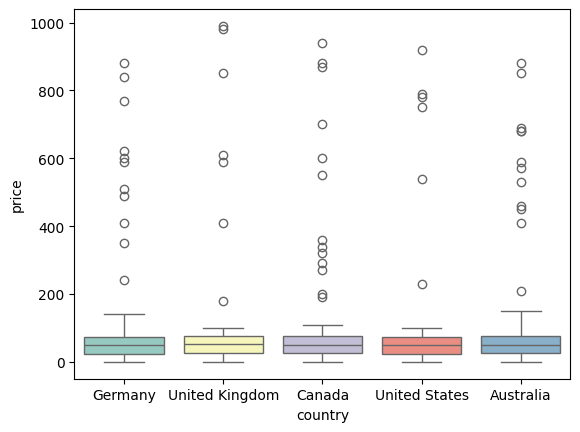

In [48]:
sns.boxplot(x='country', y='price', data=df, palette='Set3')


In [49]:
filtered_data = new_data[["country","customerid"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape


          country  customerid
0         Germany         759
1  United Kingdom          54
3          Canada         615
4         Germany         522
5   United States         578


(3476, 2)

In [50]:
# Print the number of unique values in each column of the filtered_data
filtered_data.nunique()


country         5
customerid    998
dtype: int64

<Axes: xlabel='country'>

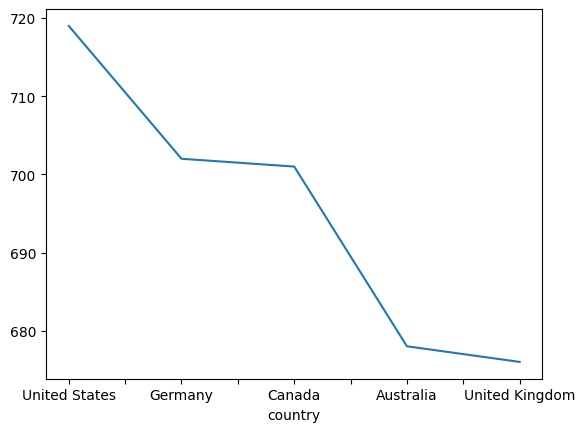

In [51]:
# Make a line plot to see the most seller countries 
filtered_data.country.value_counts()[:5].plot(kind='line')


In [52]:
# Filter the dataset to include only transactions made in the United State
US_data = new_data[new_data["country"] == "United States"]
US_data.head()

,customerid,transactions,price,quantity,country,date
5,578,"Carrots, Milk, Pasta, Potatoes, Butter",94.0,14.0,United States,2/11/2023
9,585,"Potatoes, Pasta, Apples",22.0,11.0,United States,1/9/2023
11,987,"Bananas, Carrots, Potatoes, Chicken, Cheese",12.0,7.0,United States,4/11/2022
14,571,"Beef, Potatoes, Oranges, Lettuce, Bananas",84.0,10.0,United States,3/21/2021
15,613,Lettuce,72.0,11.0,United States,7/6/2021


In [53]:
# Print the number of unique values in US_data
print(US_data.nunique())

customerid      719
transactions    977
price           106
quantity         20
country           1
date            901
dtype: int64


In [54]:
# calculate the total spending for each country
new_data['Total_spending'] = new_data['price']
total_spending_by_country = new_data.groupby('country')['Total_spending'].sum().reset_index()
print(total_spending_by_country)

          country  Total_spending
0       Australia         61643.0
1          Canada         67769.0
2         Germany         65427.0
3  United Kingdom         61117.0
4   United States         65317.0


C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\3511267379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_spending_by_country, x='country', y='Total_spending', palette='pastel')


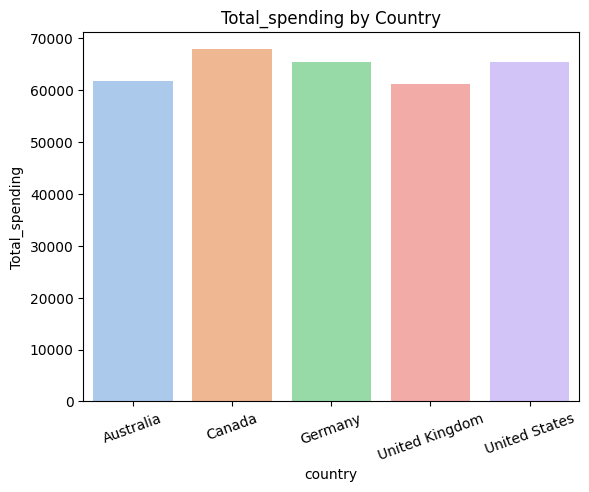

In [55]:
# Column Chart to show the total spending for each country
sns.barplot(data=total_spending_by_country, x='country', y='Total_spending', palette='pastel')
plt.title("Total_spending by Country")
plt.xticks(rotation=20)

plt.show()


C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\2692770945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='quantity', y='transactions', palette='pastel')


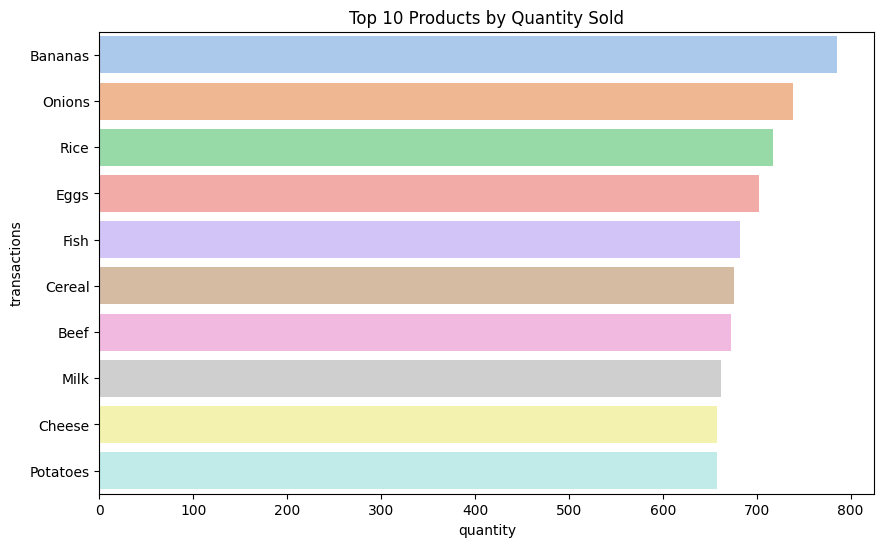

In [56]:
#Bar chart to show the top ten products
top_products = new_data.groupby('transactions')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='quantity', y='transactions', palette='pastel')
plt.title("Top 10 Products by Quantity Sold")
plt.show()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\4203264595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_customers_spending, y='Total_spending', x='customerid', palette='pastel')


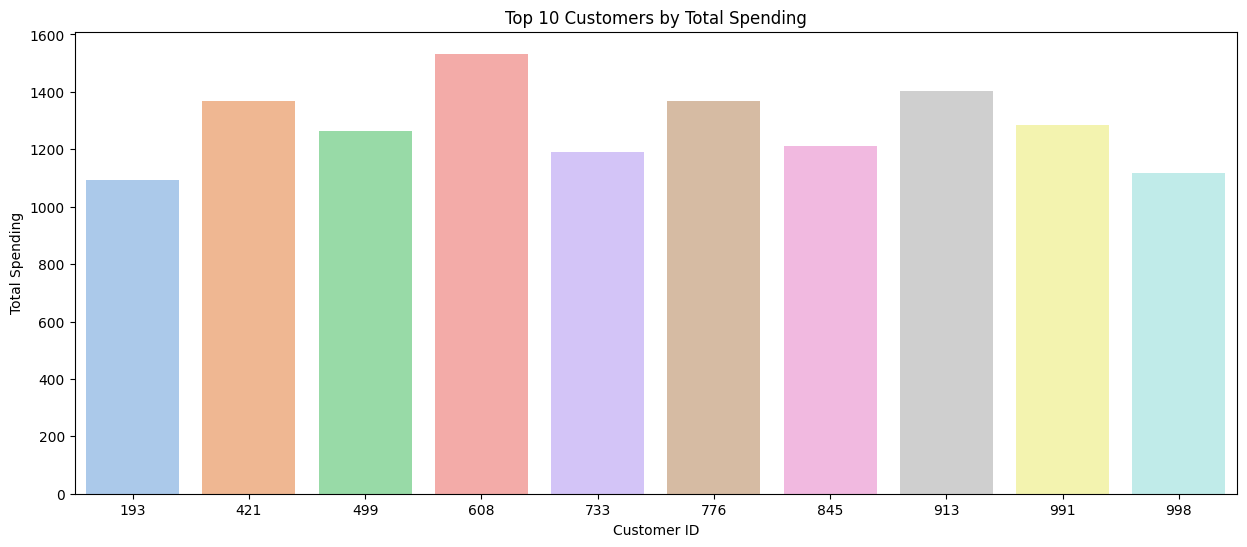

In [57]:
# calculate top ten cusotmers
new_data['Total_spending'] =  new_data['price']
total_spending_per_customer = new_data.groupby('customerid')['Total_spending'].sum().reset_index()
top_10_customers_spending = total_spending_per_customer.sort_values('Total_spending', ascending=False).head(10)
#create the plot
plt.figure(figsize=(15, 6))
sns.barplot(data=top_10_customers_spending, y='Total_spending', x='customerid', palette='pastel')

plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


In [58]:
basket_US_data=(US_data.groupby(["customerid","transactions"])["price"]
            .sum().unstack().reset_index().fillna(0).set_index("customerid")
            )
basket_US_data

transactions,Apples,"Apples, Bananas","Apples, Bananas, Cheese","Apples, Beef, Bananas","Apples, Beef, Bread, Eggs","Apples, Beef, Fish, Oranges","Apples, Beef, Lettuce, Potatoes","Apples, Bread, Chicken","Apples, Butter","Apples, Butter, Eggs",...,"Tomatoes, Lettuce, Oranges, Rice","Tomatoes, Onions, Apples, Chicken","Tomatoes, Onions, Milk, Bananas, Oranges","Tomatoes, Oranges, Chicken, Bananas, Potatoes","Tomatoes, Oranges, Chicken, Onions","Tomatoes, Pasta, Bananas","Tomatoes, Pasta, Chicken, Beef, Bananas","Tomatoes, Pasta, Fish, Eggs, Rice","Tomatoes, Potatoes","Tomatoes, Rice"
customerid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries 
def hot_encode(x): 
	if(x<= 0): 
		return 0
	if(x>= 1): 
		return 1

# Encoding the datasets 
basket_encoded = basket_US_data.applymap(hot_encode) 
basket_US_data = basket_encoded 

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\373261434.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_US_data.applymap(hot_encode)


In [60]:
# Building the model 
frq_items = apriori(basket_US_data, min_support = 0.001, use_colnames = True) 
frq_items

c:\Users\Mega Store\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.009736,(Apples)
1,0.001391,"(Apples, Bananas)"
2,0.001391,"(Apples, Bananas, Cheese)"
3,0.001391,"(Apples, Beef, Bananas)"
4,0.001391,"(Apples, Beef, Bread, Eggs)"
...,...,...
2312,0.001391,"(Oranges, Lettuce, Chicken, Tomatoes, Butter, ..."
2313,0.001391,"(Apples, Beef, Bananas, Oranges, Cereal, Lettu..."
2314,0.001391,"(Beef, Butter, Eggs, Milk, Grapes, Apples, Mil..."
2315,0.001391,"(Bananas, Bread, Beef, Cereal, Cheese, Grapes,..."


In [61]:
print(frq_items)

       support                                           itemsets
0     0.009736                                           (Apples)
1     0.001391                                  (Apples, Bananas)
2     0.001391                          (Apples, Bananas, Cheese)
3     0.001391                            (Apples, Beef, Bananas)
4     0.001391                        (Apples, Beef, Bread, Eggs)
...        ...                                                ...
2312  0.001391  (Oranges, Lettuce, Chicken, Tomatoes, Butter, ...
2313  0.001391  (Apples, Beef, Bananas, Oranges, Cereal, Lettu...
2314  0.001391  (Beef, Butter, Eggs, Milk, Grapes, Apples, Mil...
2315  0.001391  (Bananas, Bread, Beef, Cereal, Cheese, Grapes,...
2316  0.001391  (Cheese, Pasta, Potatoes, Milk, Pasta, Milk, B...

[2317 rows x 2 columns]


In [62]:
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", 
                        min_threshold = 0.00139,num_itemsets = 2) 

rules = rules.sort_values(['confidence', 'lift'], 
                        ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
26,"(Apples, Bananas)","(Bread, Butter, Apples, Fish, Lettuce)",0.001391,0.001391,0.001391,1.0,719.0,1.0,0.001389,inf,1.0,1.0,1.0,1.0
27,"(Bread, Butter, Apples, Fish, Lettuce)","(Apples, Bananas)",0.001391,0.001391,0.001391,1.0,719.0,1.0,0.001389,inf,1.0,1.0,1.0,1.0
28,"(Apples, Bananas)","(Potatoes, Apples, Carrots, Tomatoes)",0.001391,0.001391,0.001391,1.0,719.0,1.0,0.001389,inf,1.0,1.0,1.0,1.0
29,"(Potatoes, Apples, Carrots, Tomatoes)","(Apples, Bananas)",0.001391,0.001391,0.001391,1.0,719.0,1.0,0.001389,inf,1.0,1.0,1.0,1.0
30,"(Apples, Bananas)","(Potatoes, Oranges, Butter, Grapes, Milk)",0.001391,0.001391,0.001391,1.0,719.0,1.0,0.001389,inf,1.0,1.0,1.0,1.0


In [63]:
present_time = datetime.now()
present_time

datetime.datetime(2024, 12, 18, 12, 53, 53, 2656)

In [64]:
# Ensure the 'date' column is a datetime object
US_data['date'] = pd.to_datetime(US_data['date'])

# Define the current time
present_time = datetime.now()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\1405940977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['date'] = pd.to_datetime(US_data['date'])


In [65]:
rfm = US_data.groupby("customerid").agg({
    "date": lambda date: (present_time - date.max()).days,
    "transactions": lambda num: len(num),
    "price": lambda price: price.sum()
})

# Display the result
rfm.head(90)

,date,transactions,price
customerid,,,
1,1467,1,79.0
4,856,2,194.0
5,1166,1,67.0
6,527,2,7.0
7,1187,1,57.0
...,...,...,...
124,1342,1,77.0
125,1505,2,128.0
126,530,2,82.0


In [66]:
rfm.info()
rfm.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          719 non-null    int64  
 1   transactions  719 non-null    int64  
 2   price         719 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.5 KB


False

In [67]:
rfm = rfm.dropna(subset=["date"])
rfm.drop_duplicates(inplace=True)

rfm.head()

,date,transactions,price
customerid,,,
1,1467,1,79.0
4,856,2,194.0
5,1166,1,67.0
6,527,2,7.0
7,1187,1,57.0


In [68]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
customerid,,,
1,1467,1,79.0
4,856,2,194.0
5,1166,1,67.0
6,527,2,7.0
7,1187,1,57.0


In [69]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, labels=['1', '2', '3', '4'])
rfm['f_quartile'] = pd.cut(rfm['Frequency'], bins=4, labels=['4', '3', '2', '1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, labels=['4', '3', '2', '1'])
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
customerid,,,,,,
1,1467,1,79.0,4,4,2
4,856,2,194.0,3,4,1
5,1166,1,67.0,4,4,3
6,527,2,7.0,2,4,4
7,1187,1,57.0,4,4,3


In [70]:
rfm["RFM_Score"] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) +rfm.m_quartile.astype(str)
rfm.head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customerid,,,,,,,
1,1467,1,79.0,4,4,2,442
4,856,2,194.0,3,4,1,341
5,1166,1,67.0,4,4,3,443
6,527,2,7.0,2,4,4,244
7,1187,1,57.0,4,4,3,443


In [71]:
rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.sort_values('Value_Segment')

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Value_Segment
customerid,,,,,,,,
518,71,1,25.0,1,4,4,144,High-Value
340,236,3,154.0,1,3,1,131,High-Value
337,114,1,38.0,1,4,4,144,High-Value
334,166,1,43.0,1,4,4,144,High-Value
695,319,2,118.0,2,4,1,241,High-Value
...,...,...,...,...,...,...,...,...
278,788,1,18.0,3,4,4,344,Low-Value
274,1620,1,2.0,4,4,4,444,Low-Value
745,1177,1,98.0,4,4,2,442,Low-Value


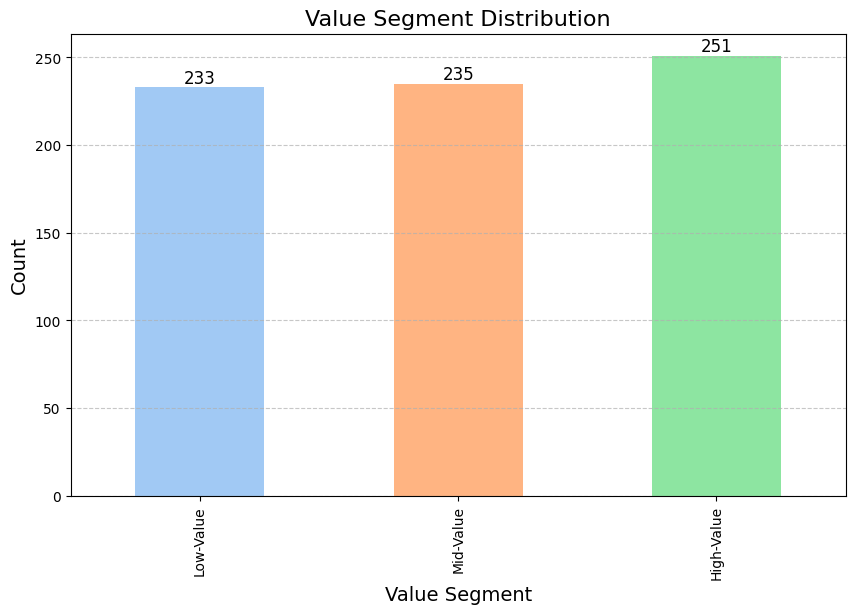

In [72]:
# Create a plot express the rfm levels
plt.figure(figsize=(10, 6)) # Set the figure size
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16) # Add a title with␣font size
ax.set_xlabel('Value Segment', fontsize=14) # Add x-label with␣font size
ax.set_ylabel('Count', fontsize=14) # Add y-label with␣font size
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add gridlines for␣better readability
# Show value annotations on top of the bars
for p in ax.patches:ax.annotate(f'{int(p.get_height())}',
(p.get_x() + p.get_width() / 2., p.get_height()),
ha='center', va='bottom', fontsize=12)
# Show the plot
plt.show()

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\3240365411.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Recency_Category', palette='pastel')


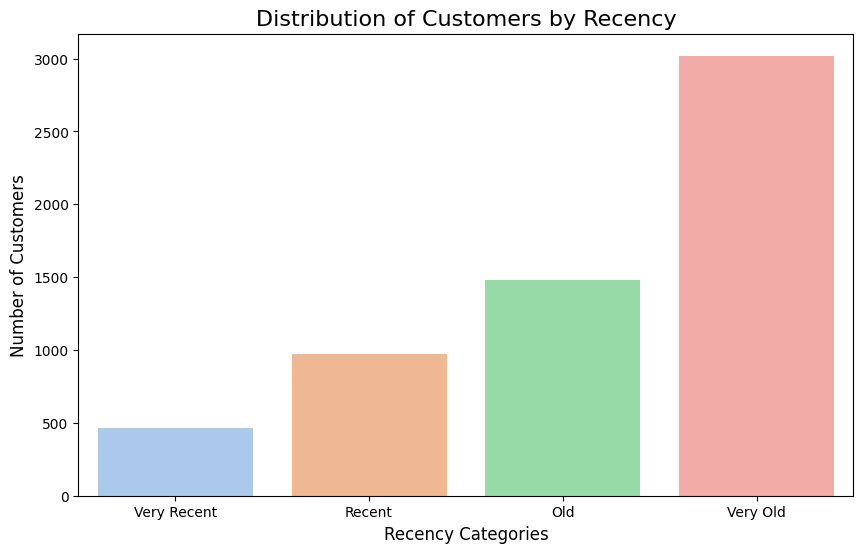

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\3240365411.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Frequency_Category', palette='pastel')


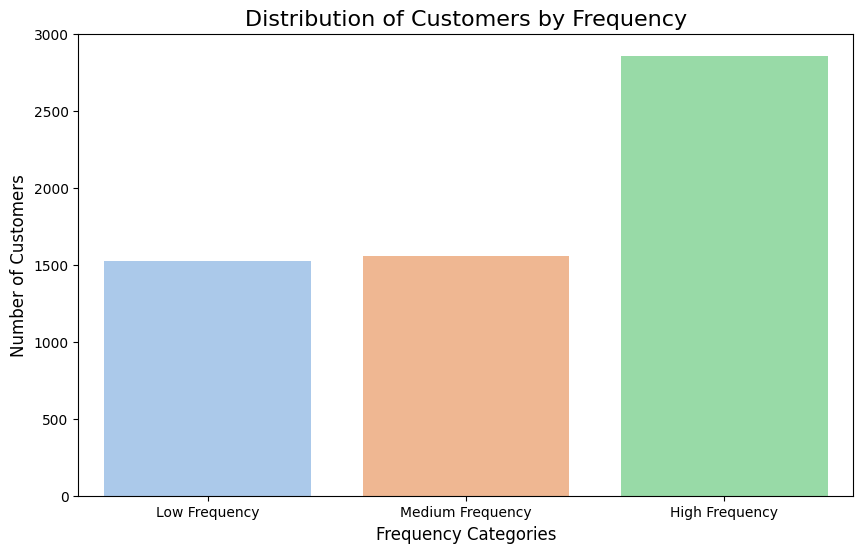

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_18912\3240365411.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Monetary_Category', palette='pastel')


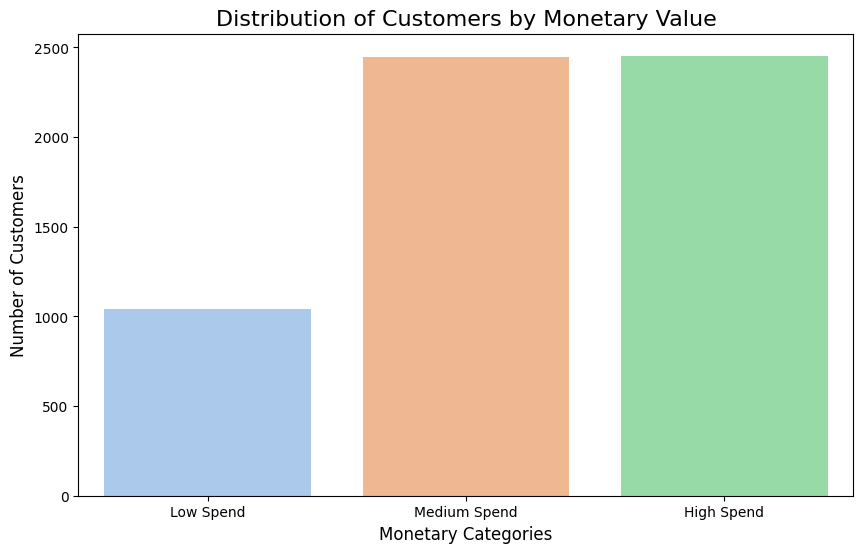

In [76]:
#to show the distribution of the customers by Recency , Frequency , Monatery
np.random.seed(0)  
n = 5941 
data = {
    'CustomerID': range(1, n+1),
    'Recency': np.random.randint(1, 365, n), 
    'Frequency': np.random.randint(1, 20, n), 
    'Monetary': np.random.randint(100, 5000, n)  
}

df = pd.DataFrame(data)

df['Recency_Category'] = pd.cut(df['Recency'], bins=[0, 30, 90, 180, 365], labels=['Very Recent', 'Recent', 'Old', 'Very Old'])

df['Frequency_Category'] = pd.cut(df['Frequency'], bins=[0, 5, 10, 20], labels=['Low Frequency', 'Medium Frequency', 'High Frequency'])

df['Monetary_Category'] = pd.cut(df['Monetary'], bins=[0, 1000, 3000, 5000], labels=['Low Spend', 'Medium Spend', 'High Spend'])


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Recency_Category', palette='pastel')
plt.title('Distribution of Customers by Recency', fontsize=16)
plt.xlabel('Recency Categories', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency_Category', palette='pastel')
plt.title('Distribution of Customers by Frequency', fontsize=16)
plt.xlabel('Frequency Categories', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monetary_Category', palette='pastel')
plt.title('Distribution of Customers by Monetary Value', fontsize=16)
plt.xlabel('Monetary Categories', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()
